# US hospital admissions

## Introduction

The purpose of this notebook is select and explore variables that could potentially explain the hospital readmission rate of diabetic patients. We will do this by analayzing the 'Diabetes 130-US hospitals' data set, obtained from UCI Machine Learning Repository. The data set contains US hospital admissions from the year 1999 to the year 2008, with 55 atrributes and 100000 number of instances. The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.



### Variable description

<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<caption>
		Variable Description
	</caption>
	<tr>
		<td style="text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>Feature name</b>
		</td>
		<td style="text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>Type</b>
		</td>
		<td style="text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>Description and values</b>
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Encounter ID
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Unique identifier of an encounter
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Patient number
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Unique identifier of a patient
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Race
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Values: Caucasian, Asian, African American, Hispanic, and other
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Gender
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Values: male, female, and unknown/invalid
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Age
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Grouped in 10-year intervals:&nbsp;0, 10),&nbsp;10, 20), …,&nbsp;90, 100)
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Weight
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Weight in pounds.
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Admission type
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Discharge disposition
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Admission source
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Time in hospital
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Integer number of days between admission and discharge
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Payer code
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Integer identifier corresponding to 23 distinct values, for example, Blue Cross<i>/</i>Blue Shield, Medicare, and self-pay
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Medical specialty
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family<i>/</i>general practice, and surgeon
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of lab procedures
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of lab tests performed during the encounter
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of procedures
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of procedures (other than lab tests) performed during the encounter
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of medications
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of distinct generic names administered during the encounter
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of outpatient visits
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of outpatient visits of the patient in the year preceding the encounter
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of emergency visits
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of emergency visits of the patient in the year preceding the encounter
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of inpatient visits
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of inpatient visits of the patient in the year preceding the encounter
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Diagnosis 1
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Diagnosis 2
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Diagnosis 3
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of diagnoses
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Numeric
			<br>
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Number of diagnoses entered to the system
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Glucose serum test result
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Indicates the range of the result or if the test was not taken. Values: “&gt;200,” “&gt;300,” “normal,” and “none” if not measured
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			A1c test result
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Indicates the range of the result or if the test was not taken. Values: “&gt;8” if the result was greater than 8%, “&gt;7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Change of medications
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Diabetes medications
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			24 features for medications
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
		</td>
	</tr>
	<tr>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Readmitted
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Nominal
		</td>
		<td style="padding-right: 3pt; padding-left: 3pt;">
			Days to inpatient readmission. Values: “&lt;30” if the patient was readmitted in less than 30 days, “&gt;30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission.
		</td>
	</tr>
</table>

### Notebook Overview

add something similar to table of content here

# Data preperation
In this section, we will explore our dataset by looking at at aspects of data quality, feature selection as well as data cleaning(e.g, taking care of missing values)

In [24]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import math
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.utils.data import get_outliers_inliers
from scipy import stats

In [2]:
df = pd.read_csv('diabetic_data.csv')
df1 = df.copy()              

In [3]:
# check data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

We will now look at the basic statistics for each datatype:

In [4]:
df1.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
df1.describe(include=['O'])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


From our basic statistics, '?' is the most frequent data point on the features: 'weight', 'payer_code' as well as 'medical_specialty'. This character indicates missing values and will therefore be converted to 'nan' value. We note that $97%$ of the 'weight' feature contains missing values (further inspection will be done on the next cell).  We also note that 'gender' is approximately evenly distributed.

In [6]:
df1['weight'].value_counts()/len(df1)

?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: weight, dtype: float64

#### Convert '?' to nan

In [7]:
df1 = df1.replace('?', np.nan)
df1.describe(include=['O'])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,17,72,716,748,789,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


'?' has now been replaced with 'nan' which will make it easier to explore our dataset

### Feature selection

We use domain knowledge in order to to seletc our features. From the article "Risk factors for readmission of inpatients with diabetes: A systematic review", found on the website: https://www.sciencedirect.com/science/article/pii/S105687271831184X, they note that age and race are one of the most commonly identified risk factors that contribute to increased readmission rates amongst people discharged from hospital with diabetes. Factors that increase the risk of diabetes and would potentionally lead to readmission are: insulin resistance, glucose levels as well as ethinic backround(https://www.webmd.com/diabetes/guide/risk-factors-for-diabetes).  Diabetes happens more often in Hispanic/Latino Americans, African-Americans, Native Americans, Asian-Americans, Pacific Islanders, and Alaska natives. Using this information, we selected the following variables to explore: 'age', 'race', 'insulin','gender', 'max_glu_serum'.

In [8]:
features = ['age', 'race', 'insulin','gender', 'max_glu_serum']
df_selected_features = df1[features]

In [9]:
for i in df_selected_features.columns:
    print()
    print(i + ':')
    print()
    print(df_selected_features[i].value_counts())


age:

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

race:

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

insulin:

No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

gender:

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

max_glu_serum:

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64


In [10]:
# Convert categorical features to numerical
obj_df = df_selected_features.select_dtypes(include=['object']).copy()
obj_df = obj_df.astype('category')

for i in obj_df.columns:
    obj_df[i] = obj_df[i].cat.codes

obj_df.head(3)

,age,race,insulin,gender,max_glu_serum
0,0,2,1,0,2
1,1,2,3,0,2
2,2,0,1,0,2


# EDA

In this section we will present plots for the selected features as well discuss the plots generated. We will also investigate correlations between variables by providing a correlation heatmap. 

In [11]:
# function for bar plot
def bar_plot(df, variable, ylabel, xlabel, title):    
    plt.figure(figsize = (10,6))
    (df[variable].value_counts().sort_index()/len(df)).plot(kind='bar')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show()

### Bar graphs

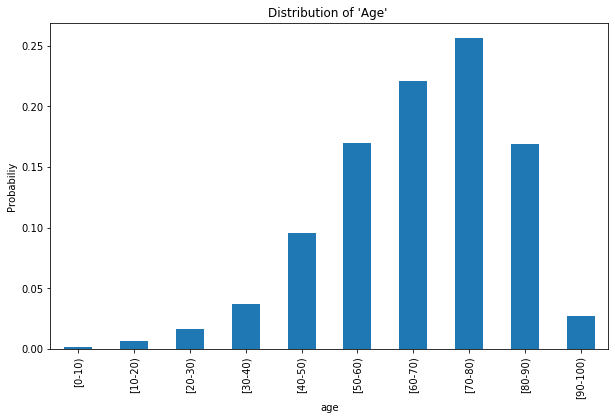

In [12]:
bar_plot(df_selected_features, "age", "Probabiliy", "age", "Distribution of 'Age' ")

In [13]:
def plot_distribution(dataset, cols=2, width=20, height=20, hspace=0.45, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

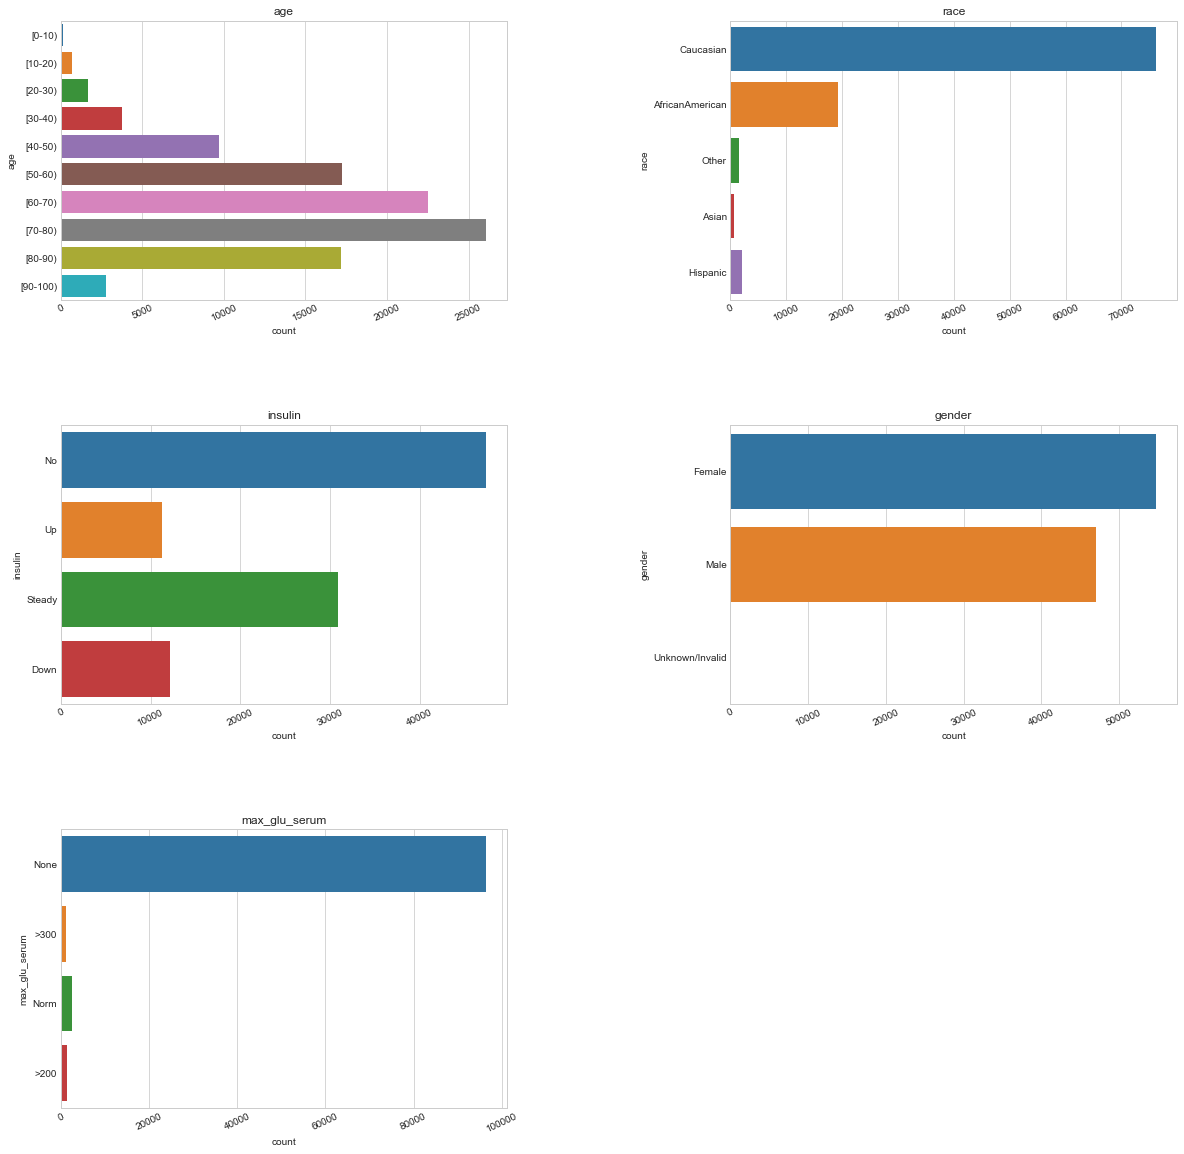

In [14]:
plot_distribution(df_selected_features)

From the bar graphs above, we see that the age range 70-80 contains the most data points. We also see that caucasian are mostly affected by diabetics. These stats are also in line with the 'Statistics about diabetes' on https://www.diabetes.org/resources/statistics/statistics-about-diabetes#:~:text=Prevalence%3A%20In%202018%2C%2034.2%20million,of%20the%20population%2C%20had%20diabetes.&text=Undiagnosed%3A%20Of%20the%2034.2%20million,and%207.3%20million%20were%20undiagnosed.<br><br>
We will now exame the relationshipn between age and gender

[[Text(0, 0, '[0-10)'),
  Text(0, 0, '[10-20)'),
  Text(0, 0, '[20-30)'),
  Text(0, 0, '[30-40)'),
  Text(0, 0, '[40-50)'),
  Text(0, 0, '[50-60)'),
  Text(0, 0, '[60-70)'),
  Text(0, 0, '[70-80)')]]

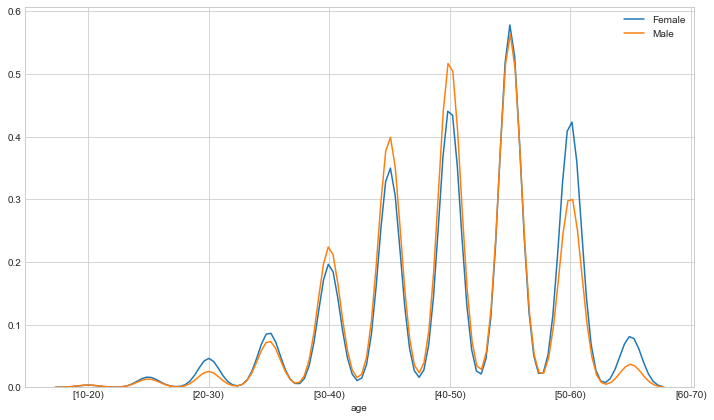

In [15]:
# age comparisons
ylabel_age = np.unique(df_selected_features['age']).tolist()
plt.figure(figsize=(12,7))
a = sns.distplot(obj_df.loc[df_selected_features['gender'] == 'Female']['age'], bins=10, kde=True, hist=False, label='Female')
a = sns.distplot(obj_df.loc[df_selected_features['gender'] == 'Male']['age'], bins=10, kde=True, hist=False, label='Male')
a.set(xticklabels=ylabel_age)



From the above plot, we see that more males are affected by diabetes from the age group 30 to 40 but the rate drops from 50 onwards. We will now examine the relationship between age and insulin level

[[Text(0, 0, '[0-10)'),
  Text(0, 0, '[10-20)'),
  Text(0, 0, '[20-30)'),
  Text(0, 0, '[30-40)'),
  Text(0, 0, '[40-50)'),
  Text(0, 0, '[50-60)'),
  Text(0, 0, '[60-70)'),
  Text(0, 0, '[70-80)')]]

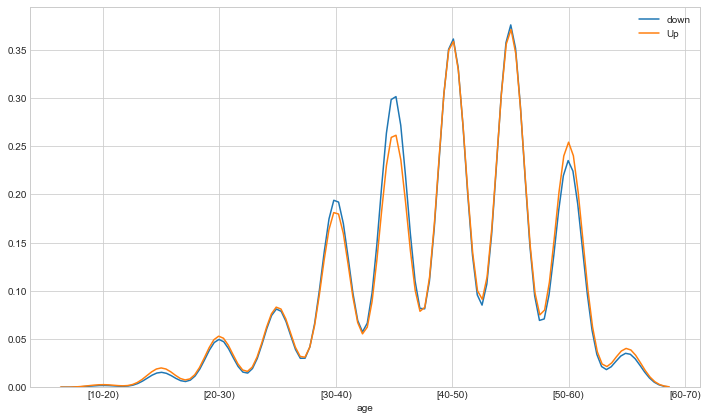

In [16]:
# Insulin levels age
plt.figure(figsize=(12,7))
label_insulin = np.unique(df_selected_features['age']).tolist()
insulinplot = sns.distplot(obj_df.loc[df_selected_features['insulin'] == 'Down']['age'], kde=True, hist=False, label='down')
insulinplot = sns.distplot(obj_df.loc[df_selected_features['insulin'] == 'Up']['age'], kde=True, hist=False, label='Up')
insulinplot.set(xticklabels=label_insulin)

From the above plot, we see that insulin levels slightly increase as the patient gets older

In [17]:
from statsmodels.graphics.gofplots import qqplot

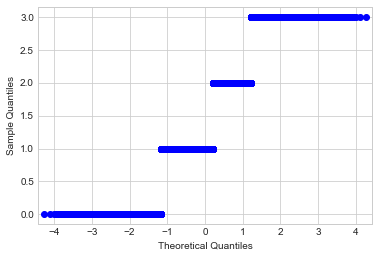

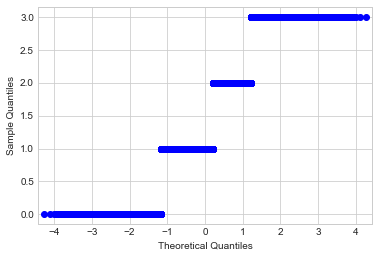

In [18]:
qqplot(obj_df['insulin'])

In [19]:
# normality test
from scipy.stats import shapiro
for i in obj_df.columns:
    stat, p = shapiro(obj_df[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.939, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.641, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.862, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.635, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.263, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\SomeRandomDube\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


# Outliers

Make use of KNN for outlier detection but will have to first one-hot encode the data

#### One hot encoding

In [34]:
Y = df.readmitted.astype('category').cat.codes.values
onehot_encoder = OneHotEncoder(sparse=False)
Xs = onehot_encoder.fit_transform(obj_df)
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.25, random_state=42)

In [38]:
outlier_fraction = 0.1
classifiers = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction)
}
plt.figure(figsize=(10, 10))
xx , yy = np.meshgrid(np.linspace(-10, 10, 76324), np.linspace(-10, 10, 27))
for i, (clf_name,clf) in enumerate(classifiers.items()) :
    # fit the dataset to the model
    clf.fit(X_train)

    # predict raw anomaly score
    scores_pred = clf.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X_train)

    # no of errors in prediction
    n_errors = (y_pred != y_train).sum()
    print('No of Errors : ',clf_name, n_errors)

    # rest of the code is to create the visualization

    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)

    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)

    subplot = plt.subplot(1, 2, i + 1)

    # fill blue colormap from minimum anomaly score to threshold value
    subplot.contourf(xx, yy, Z, levels = np.linspace(Z.min(), threshold, 10),cmap=plt.cm.Blues_r)

    # draw red contour line where anomaly score is equal to threshold
    a = subplot.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')

    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')

    # scatter plot of inliers with white dots
    b = subplot.scatter(X_train[:-n_outliers, 0], X_train[:-n_outliers, 1], c='white',s=20, edgecolor='k') 
    # scatter plot of outliers with black dots
    c = subplot.scatter(X_train[-n_outliers:, 0], X_train[-n_outliers:, 1], c='black',s=20, edgecolor='k')
    subplot.axis('tight')

    subplot.legend(
        [a.collections[0], b, c],
        ['learned decision function', 'true inliers', 'true outliers'],
        prop=matplotlib.font_manager.FontProperties(size=10),
        loc='lower right')

    subplot.set_title(clf_name)
    subplot.set_xlim((-10, 10))
    subplot.set_ylim((-10, 10))
plt.show() 


C:\Users\SomeRandomDube\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\SomeRandomDube\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\SomeRandomDube\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\SomeRandomDube\anaconda3\lib\site-packages\pyod\models\base.py:365: RuntimeWarning: invalid value encountered in greater
  self.labels_ = (self.decision_scores_ > self.threshold_).astype(
C:\Users\SomeRandomDube\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\SomeRandomDube\anaconda3\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divi

No of Errors :  Angle-based Outlier Detector (ABOD) 67816


C:\Users\SomeRandomDube\anaconda3\lib\site-packages\pyod\models\base.py:168: RuntimeWarning: invalid value encountered in greater
  return (pred_score > self.threshold_).astype('int').ravel()


ValueError: query data dimension must match training data dimension

<Figure size 720x720 with 0 Axes>